In [93]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [94]:
#loading required datasets
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
pasengeID_test = test_data["PassengerId"]
print(train_data.head())
print(test_data.head())


# Step 1: Ensure 'PassengerId' is of string type
#train_data['PassengerId'] = train_data['PassengerId'].astype(str)
#test_data['PassengerId'] = test_data['PassengerId'].astype(str)

# Steps 2, 3, and 4: Split, select the second element, and convert to integer
#train_data['family_members'] = train_data['PassengerId'].str.split('_').str[1].astype(int)
#test_data['family_members'] = test_data['PassengerId'].str.split('_').str[1].astype(int)

# Convert family_members to binary
#train_data['family_members'] = train_data['family_members'].apply(lambda x: 1 if x > 1 else 0)
#test_data['family_members'] = test_data['family_members'].apply(lambda x: 1 if x > 1 else 0)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [95]:
#Creating age groups as 0-5 as Kid, 5-18 as teenage 19-40 as young and rest adult fill age with median where na
#train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
#test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
#train_data['age_group'] = pd.cut(train_data['Age'], bins=[0, 5, 18, 40, 100], labels=[1,2,3,4])
#test_data['age_group'] = pd.cut(test_data['Age'], bins=[0, 5, 18, 40, 100], labels=[1,2,3,4])


In [96]:
#removingtarget column from train data
y = train_data["Transported"]
x = train_data.drop('Transported', axis = 1)
x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,family_members,age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,4
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,2


In [97]:
#Feature engineering for money spent
x["MoneySpent"] = x["RoomService"] + x["FoodCourt"]+ x["ShoppingMall"]+ x["Spa"]+ x["VRDeck"]
test_data["MoneySpent"] = test_data["RoomService"] + test_data["FoodCourt"]+ test_data["ShoppingMall"]+ test_data["Spa"]+ test_data["VRDeck"]

x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,family_members,age_group,MoneySpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,3,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,4,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,3,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,2,1091.0


In [98]:
#Removing unnecessary columns that we think are not relevant
x = x.drop(["PassengerId", "Name", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis= 1)
test_data = test_data.drop(["PassengerId", "Name", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis= 1)

x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,family_members,age_group,MoneySpent
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0,3,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0,3,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,0,4,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,1,3,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,0,2,1091.0


In [99]:
#Divide Cabin into decks, num and side column
x[['Deck', 'Num', 'Side']] = x['Cabin'].str.split('/', expand=True)
x.drop("Cabin", axis=1,inplace=True)


test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)
test_data.drop("Cabin", axis=1, inplace=True)

test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,family_members,age_group,MoneySpent,Deck,Num,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0,3,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0,3,2832.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0,3,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0,3,7418.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,0,3,645.0,F,5,S


In [100]:
##Filling NaN with relevant values for each column
#x["Deck"].fillna("U", inplace=True)
#x["Side"].fillna("U", inplace=True)
#x["HomePlanet"].fillna("Earth", inplace=True)
#x["Age"].fillna(x["Age"].median(), inplace=True)
#x["Destination"].fillna("TRAPPIST-1e", inplace=True)
#x["MoneySpent"].fillna(0, inplace=True)
#x["VIP"].fillna("False", inplace=True)
#x["CryoSleep"].fillna("False", inplace=True)

##Filling test data same way as train data
#test_data["Deck"].fillna("U", inplace=True)
#test_data["Side"].fillna("U", inplace=True)
#test_data["HomePlanet"].fillna("Earth", inplace=True)
#test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
#test_data["Destination"].fillna("TRAPPIST-1e", inplace=True)
#test_data["MoneySpent"].fillna(0, inplace=True)
#test_data["VIP"].fillna("False", inplace=True)
#test_data["CryoSleep"].fillna("False", inplace=True)


In [101]:
#Changing num column to float
x["Num"] = x["Num"].astype(float)
test_data["Num"] = test_data["Num"].astype(float)

In [102]:
#One hot encoding the categorical variables
#Selecting all categorical columns
categorical_columns = x.select_dtypes(include=['object']).columns
categorical_columns


# Converting categorical columns to numeric using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

#Converting the values to type string
x[categorical_columns] = x[categorical_columns].astype(str)
test_data[categorical_columns] = test_data[categorical_columns].astype(str)

#Fit the encoder
x[categorical_columns] = encoder.fit_transform(x[categorical_columns])
test_data[categorical_columns] = encoder.fit_transform(test_data[categorical_columns])
x['Transported'] = y
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,family_members,age_group,MoneySpent,Deck,Num,Side,Transported
0,1.0,0.0,2.0,39.0,0.0,0,3,0.0,1.0,0.0,0.0,False
1,0.0,0.0,2.0,24.0,0.0,0,3,736.0,5.0,0.0,1.0,True
2,1.0,0.0,2.0,58.0,1.0,0,4,10383.0,0.0,0.0,1.0,False
3,1.0,0.0,2.0,33.0,0.0,1,3,5176.0,0.0,0.0,1.0,False
4,0.0,0.0,2.0,16.0,0.0,0,2,1091.0,5.0,1.0,1.0,True


In [103]:
## Creating a pair plot
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.pairplot(x, hue="Transported")

<AxesSubplot:>

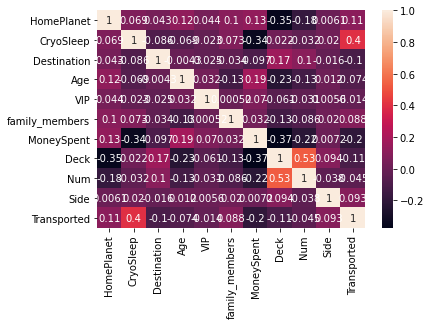

In [104]:
# Creating a heatmap between just the categorical columns
import seaborn as sns
sns.heatmap(x.corr(), annot=True)

In [105]:
#Filling missing values
x.drop("Transported", axis=1, inplace=True)
x.fillna(x.mode().iloc[0], inplace = True)
test_data.fillna(test_data.mode().iloc[0], inplace=True)

x.isnull().sum()


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
family_members    0
age_group         0
MoneySpent        0
Deck              0
Num               0
Side              0
dtype: int64

In [106]:
#Implementing grid search to fit a best model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# fit the logistic regression model


# Use the existing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a pipeline step for preprocessing
preprocessing = Pipeline([
    ('scaler', StandardScaler())
])

# Define your models and their parameter grids
models_and_parameters = [
    (LogisticRegression(), {'model__C': [0.1, 1, 10]}),
    (RandomForestClassifier(), {'model__n_estimators': [10, 50, 100]}),
    (GradientBoostingClassifier(), {'model__learning_rate': [0.01, 0.1, 0.5]})
]

best_models = []
best_scores = []

for model, param_grid in models_and_parameters:
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])

    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Store the best model and its score
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)

# Find the model with the best score
best_index = best_scores.index(max(best_scores))
best_model = best_models[best_index]

print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Score: {best_scores[best_index]}")

# Optionally, evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Best Model: Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('model', GradientBoostingClassifier())])
Best Cross-Validation Score: 0.7523751351183611
Test Set Accuracy: 0.7538815411155837


In [107]:
from sklearn.tree import DecisionTreeClassifier

#Fitting a model Decision tree classifier

model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [108]:
# get predictions
predictions = best_model.predict(test_data)
# create a dataframe with the passenger id and the predictions
submission = pd.DataFrame({"PassengerId": pasengeID_test, "Transported": predictions})
print(submission.head())
# save the dataframe to a csv file
submission.to_csv("data/submission.csv", index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01        False
4     0023_01        False
